### 图解机器学习第三章
> 最小二乘法拟合

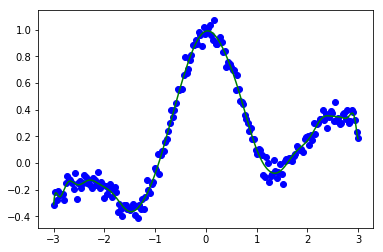

In [74]:
#3.2
import numpy as np
from numpy.linalg import pinv
import matplotlib.pyplot as plt

n,N = 200,10000
x=np.matrix(np.linspace(-3,3,n)).T
X=np.matrix(np.linspace(-3,3,N)).T

pix=np.pi*x
y=np.sin(pix)/(pix)+0.1*x+0.05*np.random.randn(n,1)

p=np.matrix(np.ones([n,31]))
P=np.matrix(np.ones([N,31]))

for j in range(1,16):
	p[:,2*j-1]=np.sin(j/2*x)       # numpy index from zero,while matlab index from one.
	p[:,2*j]=np.cos(j/2*x)
	P[:,2*j-1]=np.sin(j/2*X)
	P[:,2*j]=np.cos(j/2*X)

t = pinv(p).dot(y)
F = P.dot(t)
plt.plot(x,y,'bo')
plt.plot(X,F,'g-')
plt.show()

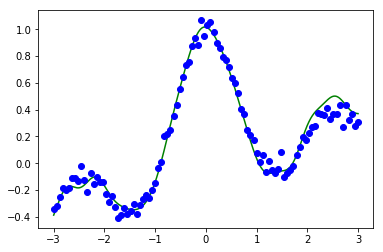

In [77]:
#3.8
import numpy as np
import math
import random
import matplotlib.pyplot as plt

n,N = 100,1000

x=np.matrix(np.linspace(-3,3,n)).T
X=np.matrix(np.linspace(-3,3,N)).T

pix=np.pi*x
y=np.sin(pix)/(pix)+0.1*x+0.05*np.random.randn(n,1)

hh=2*np.square(0.3)
t0=np.random.randn(n,1)
e=0.1

for o in range(1,n*1000):
	i=math.ceil(random.random()*n)
	ki=np.exp(-np.square((x-x[i-1]))/hh)
	t=t0-e*ki*(ki.T*t0-y[i-1])
	if np.linalg.norm(t-t0) < 0.000001:
		break
	t0=t

K=np.exp(-(np.tile(np.square(X),(1,n))+np.tile(np.square(x).T,(N,1))-2*X*(x.T))/hh)
F=K*t

plt.plot(X,F,'g-')
plt.plot(x,y,'bo')
plt.show()

### 图解机器学习第四章
> 带有约束条件的最小二乘法

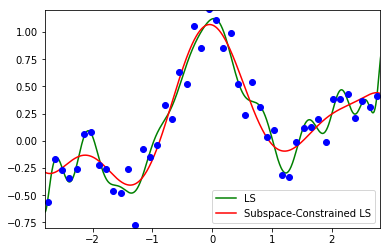

In [2]:
#4.3
import numpy as np
from numpy.linalg import pinv
import matplotlib.pyplot as plt

n,N = 50,1000

x=np.matrix(np.linspace(-3,3,n)).T
X=np.matrix(np.linspace(-3,3,N)).T

pix=np.pi*x
y=np.sin(pix)/(pix)+0.1*x+0.2*np.random.randn(n,1)

p=np.matrix(np.ones([n,31]))
P=np.matrix(np.ones([N,31]))

for j in range(1,16):
	p[:,2*j-1]=np.sin(j/2*x)       # numpy index from zero,while matlab index from one.
	p[:,2*j]=np.cos(j/2*x)
	P[:,2*j-1]=np.sin(j/2*X)
	P[:,2*j]=np.cos(j/2*X)

t1 = pinv(p).dot(y)
F1= P.dot(t1)
t2 = pinv(p.dot(np.diag(np.hstack((np.ones(11),np.zeros(20)))))).dot(y)
F2 = P.dot(t2)


plt.xlim(-2.8,2.8)
plt.ylim(-0.8,1.2)
l1, = plt.plot(X,F1,'g-')
l2, = plt.plot(X,F2,'r-')
plt.plot(x,y,'bo')
plt.legend(handles=[l1,l2], labels=['LS','Subspace-Constrained LS'], loc='best')
plt.show()

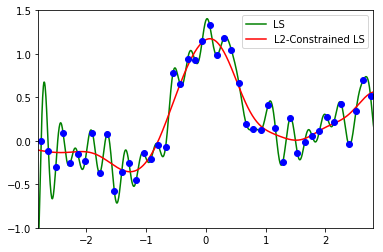

In [11]:
#4.7
import numpy as np
from numpy.linalg import pinv
import matplotlib.pyplot as plt

n,N = 50,1000

x=np.matrix(np.linspace(-3,3,n)).T
X=np.matrix(np.linspace(-3,3,N)).T

pix=np.pi*x
y=np.sin(pix)/(pix)+0.1*x+0.2*np.random.randn(n,1)        #Matlab:randperm

x2 = np.power(x,2)
X2 = np.power(X,2)

hh=2*0.3**2
l = 0.1

k=np.exp(-(np.tile(x2,(1,n))+np.tile(x2.T,(n,1))-2*x.dot(x.T))/hh)   # Matlab:repmat
K=np.exp(-(np.tile(X2,(1,n))+np.tile(x2.T,(N,1))-2*X.dot(x.T))/hh)

t1 = pinv(k).dot(y)
F1 = K.dot(t1)
t2 = pinv(k.dot(k)+np.eye(n)).dot(k*y)
F2 = K.dot(t2)

plt.xlim(-2.8,2.8)
plt.ylim(-1,1.5)
l1, = plt.plot(X,F1,'g-')
l2, = plt.plot(X,F2,'r-')
plt.plot(x,y,'bo')
plt.legend(handles=[l1,l2], labels=['LS','L2-Constrained LS'], loc='best')
plt.show()

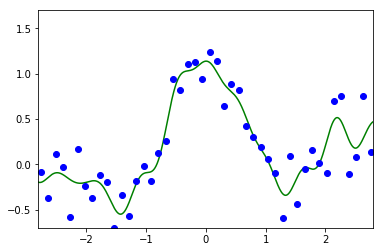

In [71]:
#4.14
import numpy as np
from numpy.linalg import pinv
import matplotlib.pyplot as plt

n,N = 50,1000

x=np.matrix(np.linspace(-3,3,n)).T
X=np.matrix(np.linspace(-3,3,N)).T

pix=np.pi*x
y=np.sin(pix)/(pix)+0.1*x+0.2*np.random.randn(n,1)

x2 = np.power(x,2)
xx = np.tile(x2,(1,n))+np.tile(x2.T,(n,1))-2*x.dot(x.T)
hhs = 2 * np.power(np.array([0.03,0.3,3]),2)
ls = [0.0001,0.1,100]
m=5
u=np.floor(m*np.linspace(0,n-1) / n) + 1
u=np.random.permutation(u)

g = np.zeros((len(hhs),len(ls),m))

for hk in range(0,len(hhs)):
    hh = hhs[hk]
    k=np.exp(-xx/hh)
    for i in range(1,m+1):
        ki = k[np.where((u!=i)==True)[0],:]       # filter the matrix 
        kc = k[np.where((u==i)==True)[0],:]       # 选择有相同元素的行
        yi = y[u!=i]
        yc = y[u == i]
        for lk in range(0,len(ls)):
            l=ls[lk]
            t=pinv(ki.T.dot(ki) + 1*np.eye(n)).dot(ki.T.dot(yi))
            fc = kc.dot(t)
            g[hk,lk,i-1] = np.mean(np.power(fc-yc,2))
gl = np.mean(g,2).min(1)
ggl = np.argmin(np.mean(g,2),1)
gh1 = np.min(gl)
ggh1 = np.argmin(gl)

L = ls[ggl[ggh1]]
HH = hhs[ggh1]

K = np.exp(-(np.tile(np.power(X,2),(1,n))+np.tile(x2.T,(N,1))-2*X.dot(x.T))/HH)
k = np.exp(-xx/HH)

t = pinv(k.dot(k)+L*np.eye(n)).dot(k*y)
F=K.dot(t)


plt.xlim(-2.8,2.8)
plt.ylim(-0.7,1.7)
l1, = plt.plot(X,F,'g-')
plt.plot(x,y,'bo')
plt.show()            